In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section 1 - Estimating black hole mass using scaling relations

In [2]:
data = pd.read_csv('shen_subsample_500.csv')

Text(0, 0.5, 'Log Luminosity')

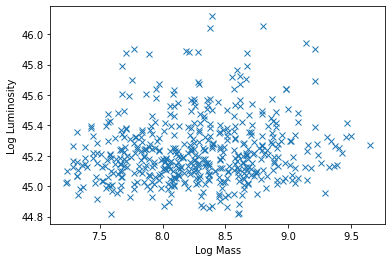

In [3]:
plt.plot(data['logBH'], data['logLbol'],'x')
plt.xlabel('Log Mass')
plt.ylabel('Log Luminosity')

In [4]:
target_data = data[['Plate','MJD','Fiber']]

In [5]:
target_data.head()

,Plate,MJD,Fiber
0,1372,53062,486
1,1984,53433,609
2,885,52379,449
3,2614,54481,350
4,1278,52735,96


In [6]:
target_data.to_csv('cross_reference.txt', sep=' ', index=False)

# This csv file was used in cross reference SDSS search to obtain the z and H beta flux values

## This is the csv file obtained from this search:

In [7]:
new_data = pd.read_csv('Skyserver_CrossID5_14_2025 2_07_13 PM.csv',skiprows=1)

In [8]:
new_data.head()

,h_beta_flux,z
0,287.04930,0.201720
1,54.28283,0.284118
2,177.43190,0.260308
3,592.70640,0.231123
4,261.00460,0.162649


In [9]:
total_data = data.join(new_data, how='inner') # Combine the two tables to avoid cross matching errors.

In [10]:
total_data.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,h_beta_flux,z
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20,287.04930,0.201720
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87,54.28283,0.284118
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03,177.43190,0.260308
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33,592.70640,0.231123
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23,261.00460,0.162649


Text(0, 0.5, 'FWHM')

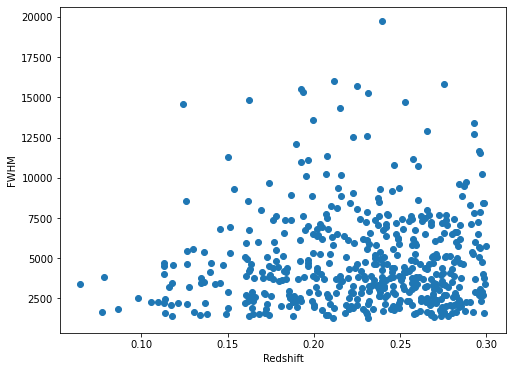

In [11]:
plt.figure(figsize=(8,6))
plt.plot(total_data['z'], total_data['W_BHb_'],'o')
plt.xlabel('Redshift')
plt.ylabel('FWHM')
#plt.savefig('1a1.png')  

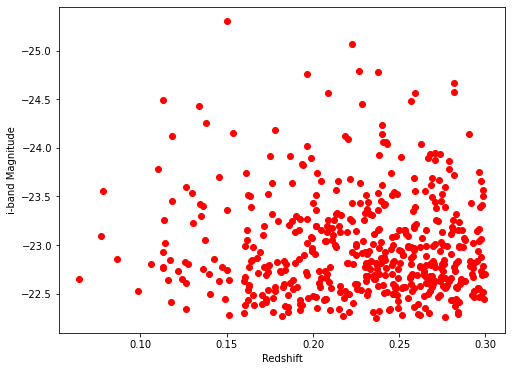

In [12]:
plt.figure(figsize=(8,6))
plt.plot(total_data['z'], total_data['iMAG'],'o',color='red')
plt.xlabel('Redshift')
plt.ylabel('i-band Magnitude')
plt.gca().invert_yaxis()
#plt.savefig('1a2.png')

# Calculating H beta Luminosity:

In [13]:
from scipy.integrate import quad
H_0 = 67.8 / 3.09e19
c = 3e10
omega_m = 0.31
omega_gamma = 0.69
D_H = c/H_0

In [14]:
def E(z):
    return (1/(np.sqrt((omega_m*((1+z)**3))+omega_gamma)))

In [15]:
def find_Luminosity(z,flux):
    result, error = quad(E, 0, z)
    D_L = (1+z) * D_H * result
    ans = D_L**2 * 4*np.pi * flux*10**(-17)
    return(ans)
luminosity = np.zeros(500)
for i in range(500):
    luminosity[i] = find_Luminosity(total_data['z'][i],total_data['h_beta_flux'][i])
total_data['L'] = luminosity # Luminosity given in erg/s 

# Calculating M_BH:

In [16]:
def Black_Hole_Mass(L,FWHM):
    return((2.4e6*((L/ 10**(42)))**0.59) *(FWHM/10**3)**2)
masses = np.zeros(500)
for i in range(500):
    masses[i] = Black_Hole_Mass(total_data['L'][i],total_data['W_BHb_'][i]) # 'fwhm_h_beta'
total_data['M_BH (solar masses)'] = masses

# Calculating Eddington Luminosity:

In [17]:
L_edd = np.zeros(500)
for i in range(500):
    L_edd[i] = 1.38e38 * total_data['M_BH (solar masses)'][i]
total_data['L_edd'] = L_edd

# Calculating Bolometric Luminosity:

In [18]:
def L_bol(L):
    one = 0.94* np.log10(L)
    return(10**(one + 5.39))
L_bol_array = np.zeros(500)
for i in range(500):
    L_bol_array[i] = L_bol(total_data['L'][i])
total_data['L_bol'] = L_bol_array

In [19]:
Edd_ratio = np.zeros(500)
for i in range(500):
    Edd_ratio[i] = total_data['L_bol'][i] / total_data['L_edd'][i]
total_data['Edd_ratio'] = Edd_ratio

In [20]:
total_data.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,logBH,e_logBH,logEdd,h_beta_flux,z,L,M_BH (solar masses),L_edd,L_bol,Edd_ratio
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,...,8.33,0.07,-1.20,287.04930,0.201720,3.588832e+41,2.537469e+07,3.501707e+45,2.829150e+44,0.080793
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,...,7.59,0.20,-0.87,54.28283,0.284118,1.472798e+41,4.359386e+06,6.015953e+44,1.224770e+44,0.203587
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,...,9.05,0.35,-2.03,177.43190,0.260308,3.941509e+41,1.603253e+08,2.212490e+46,3.089746e+44,0.013965
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,...,9.36,0.02,-2.33,592.70640,0.231123,1.005618e+42,5.593592e+08,7.719157e+46,7.452245e+44,0.009654
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,...,7.29,0.03,-0.23,261.00460,0.162649,2.025744e+41,1.796271e+06,2.478854e+44,1.652682e+44,0.666712


# Analyse the results:

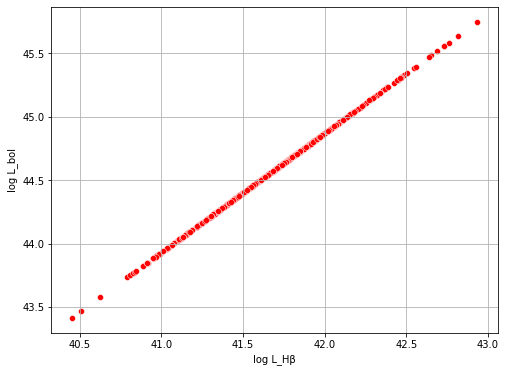

In [21]:
import seaborn as sns
plt.figure(figsize=(8,6)) # Similar to fig 2 from Wu2009
sns.scatterplot(y=np.log10(total_data['L_bol']),x=np.log10(total_data['L']),marker = 'o',color='red')
plt.xlabel('log L_Hβ')
plt.ylabel('log L_bol')
plt.grid(True)
#plt.savefig('example.png')

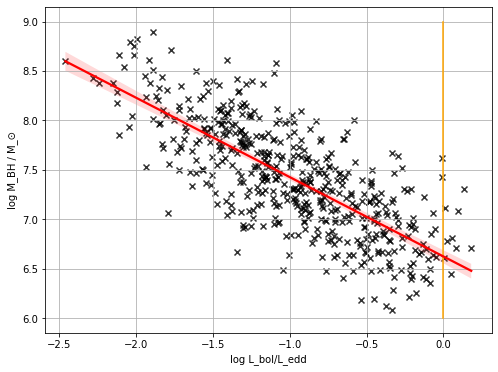

In [22]:
x1 = np.zeros(2) # Include Eddington Limit
y1 = [6,9]
plt.figure(figsize=(8,6)) # Similar to fig 7 from McLure & Dunlop (2002)
plt.plot(x1,y1,color='orange')
sns.regplot(x=np.log10(total_data['L_bol'] / total_data['L_edd']),y=np.log10(total_data['M_BH (solar masses)']),scatter_kws={'color': 'black'},marker='x',color='red')
plt.xlabel('log L_bol/L_edd')
plt.ylabel('log M_BH / M_⊙')
#plt.ylim(5.4,8.5)
plt.grid(True)
#plt.savefig('1c1')

In [39]:
from scipy.stats import linregress
slope, intercept, _, _, _ = linregress(np.log10(total_data['L_bol'] / total_data['L_edd']), np.log10(total_data['M_BH (solar masses)']))

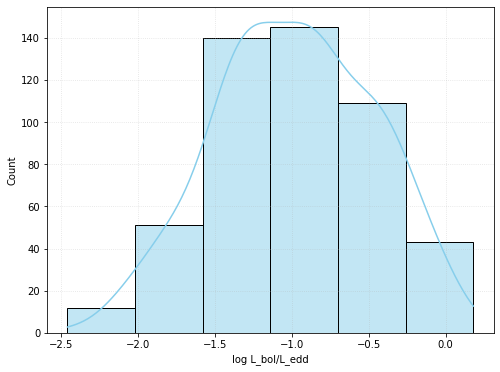

In [23]:
plt.figure(figsize=(8,6)) # Similar to fig 4 from Wu2009
sns.histplot(np.log10(total_data['Edd_ratio']),bins=6,kde=True, color='skyblue')
plt.xlabel('log L_bol/L_edd')
plt.grid(True,linestyle=':',alpha=0.4)
#plt.savefig('1c2')

# Section 2 - Calculate BH Mass using host galaxy absolute magnitude

In [24]:
# From McLure & Dunlop (2002):
# log(Mbh/ M⊙) = −0.50 M_R − 2.96

In [25]:
object_names = ['3C 459','3C 346','3C 303.1','3C 268.3','3C 459','PKS 1549-79','3C 190']
R_magnitudes = [-23.15,-22.58,-22.48,-22.03,-21.77,-21.82,-23.91]

estimated_log_BHMasses = np.zeros(len(R_magnitudes))
for i in range(len(R_magnitudes)):
    estimated_log_BHMasses[i] = -(0.5*R_magnitudes[i]) - 2.96

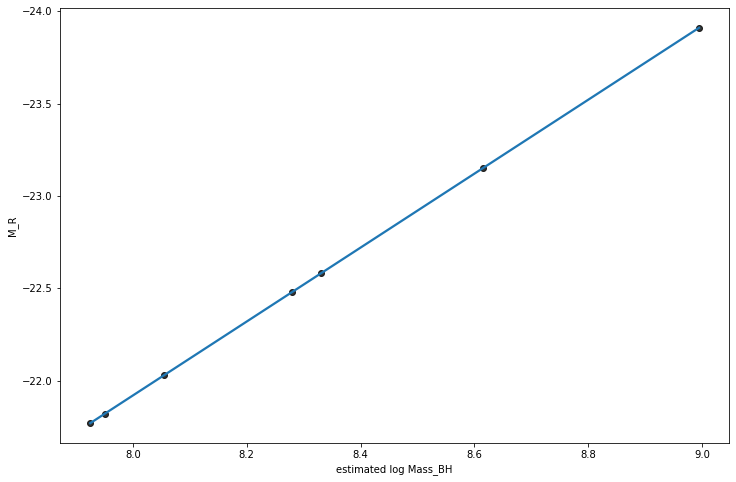

In [26]:
plt.figure(figsize = (12,8))
sns.regplot(x = estimated_log_BHMasses, y=R_magnitudes,scatter_kws={'color': 'black'},marker='o')
plt.xlabel('estimated log Mass_BH')
plt.ylabel('M_R')
plt.gca().invert_yaxis()

In [27]:
actual_log_BHMasses = [8.5,8.8,8.4,7.8,8.5,8,9.1] # Found from table 1 in Wu (2009)

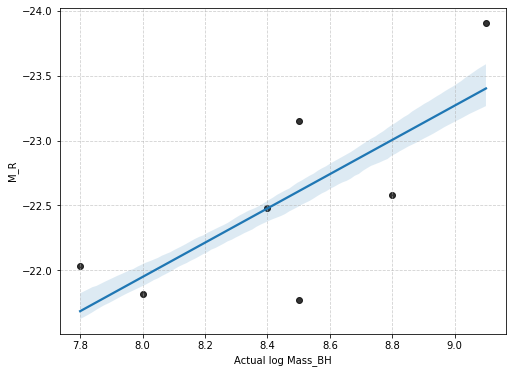

In [28]:
plt.figure(figsize = (8,6)) # Figure inspired by fig 1 in McLure & Dunlop (2002).
sns.regplot(x = actual_log_BHMasses, y=R_magnitudes,scatter_kws={'color': 'black'},marker='o',ci=30)
plt.xlabel('Actual log Mass_BH')
plt.ylabel('M_R')
plt.grid(True,linestyle='--',alpha=0.6)
plt.gca().invert_yaxis()
#plt.savefig('2a.png')

In [29]:
data = {
    'Name': object_names,
    'Predicted BH Mass': estimated_log_BHMasses,
    'Actual BH Mass': actual_log_BHMasses
}

df = pd.DataFrame(data)
print(df)

          Name  Predicted BH Mass  Actual BH Mass
0       3C 459              8.615             8.5
1       3C 346              8.330             8.8
2     3C 303.1              8.280             8.4
3     3C 268.3              8.055             7.8
4       3C 459              7.925             8.5
5  PKS 1549-79              7.950             8.0
6       3C 190              8.995             9.1


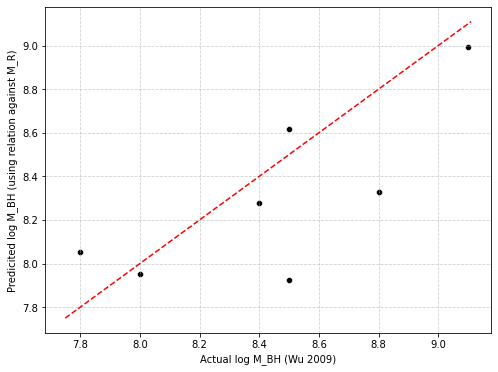

In [30]:
lim = [7.75,9.11]
plt.figure(figsize = (8,6))
sns.scatterplot(data = df,x = 'Actual BH Mass', y='Predicted BH Mass',marker='o',color='black')
plt.plot(lim,lim,'--',color='red')
plt.ylabel('Predicited log M_BH (using relation against M_R)')
plt.xlabel('Actual log M_BH (Wu 2009)')
plt.grid(True,linestyle='--',alpha=0.6)
#plt.savefig('2b.png')

# Plot of Eddington Ratio against Black Hole Mass:

In [31]:
object_names = ['3C 459','3C 346','3C 303.1','3C 268.3','3C 459','PKS 1549-79','3C 190']

In [37]:
df.head()

,Name,Predicted BH Mass,Actual BH Mass,L_edd
0,3C 459,8.615,8.5,1.188870e+39
1,3C 346,8.330,8.8,1.149540e+39
2,3C 303.1,8.280,8.4,1.142640e+39
3,3C 268.3,8.055,7.8,1.111590e+39
4,3C 459,7.925,8.5,1.093650e+39


In [32]:
actual_eddington_ratios = [] # Values are NaN in table 1 for the objects above!

In [33]:
z_values = [0.220,0.162,0.270,0.372,0.210,0.152,1.195]

In [40]:
Edd_ratios = (df['Predicted BH Mass'] - intercept) / slope

In [42]:
df['Eddington Ratio'] =  Edd_ratios

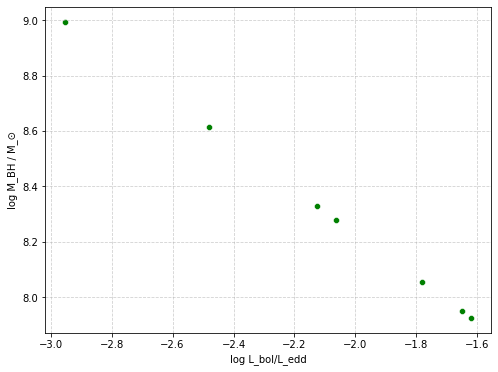

In [52]:
x1 = np.zeros(2) # Include Eddington Limit
y1 = [6,9] # y-axis limit
plt.figure(figsize=(8,6)) # Similar to fig 7 from McLure & Dunlop (2002)
#plt.plot(x1,y1,color='orange')
sns.scatterplot(x=df['Eddington Ratio'],y=df['Predicted BH Mass'],marker='o',color='green')
plt.xlabel('log L_bol/L_edd')
plt.ylabel('log M_BH / M_⊙')
#plt.ylim(5.4,8.5)
plt.grid(True,linestyle='--',alpha=0.6)
plt.savefig('final.png')

# Finding which galaxies have data with R (cousins) band:

In [ ]:
file_path = 'result.txt'

# Skip initial lines until we reach the header row
with open(file_path, 'r') as file:
    lines = file.readlines()

# Find the header line and the index to start reading the table
for i, line in enumerate(lines):
    if line.strip().startswith("No.|Object Name|"):
        header_line = line.strip()
        start_index = i + 1
        break

# Extract headers
headers = [col.strip() for col in header_line.split('|')]

# Read the data lines starting from the index
data_lines = lines[start_index:]

# Filter out any non-data lines
data_lines = [line.strip() for line in data_lines if line.strip() and '|' in line]

# Convert the data into a list of lists
data = [line.split('|') for line in data_lines]

# Ensure each row has the same number of columns as headers
data = [row for row in data if len(row) == len(headers)]

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the first few rows
print(df.head())

In [ ]:
df['Magnitude and Filter']

In [ ]:
items_with_R = [item for item in df['Magnitude and Filter'] if 'R' in item]

In [ ]:
matching_indicies = [i for i, item in enumerate(df['Magnitude and Filter']) if item in items_with_R]

In [ ]:
df['Object Name'][0]

In [ ]:
names = ['placeholder'] * len(matching_indicies)
for i in range(len(matching_indicies)):
    names[i] = df['Object Name'][matching_indicies[i]]

In [ ]:
data2 = {
    'Index number': matching_indicies,
    'Target Names': names
}

df2 = pd.DataFrame(data2)
df2.head()

In [ ]:
df2.tail()